In [4]:
#importing preprocessing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing dataset
dataset = pd.read_csv('Mall_Customers.csv')



In [5]:
# Basic information about dataset
print(dataset.shape)
print(dataset.head())
print(dataset.describe())

# Select the relevant variables for clustering
relevant_vars = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.0000

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   19                  15                      39
1           2   21                  15                      81
2           3   20                  16                       6
3           4   23                  16                      77
4           5   31                  17                      40


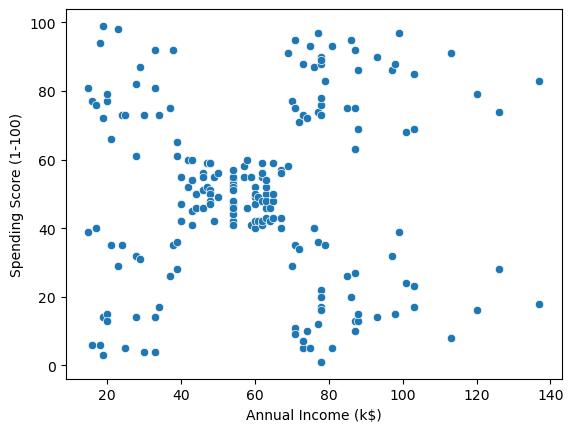

KMeans(n_clusters=5)

In [6]:
# Drop the irrelevant variables
dataset_1 = dataset[relevant_vars]


print(dataset_1.head())

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=dataset)
plt.show()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Creating an instance of KMeans
k_means = KMeans(n_clusters=5)

k_means.fit(dataset_1)



In [7]:
# Predicting the clusters
y_pred = k_means.predict(dataset_1)


# Calculating the WSS
# Calculate WSS for each value of k
wss = []
for k in range(1, 10):
    k_means = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    k_means.fit(dataset_1)
    wss.append(k_means.inertia_)


In [8]:
# Calculating the Silhouette Score
silhouette = silhouette_score(dataset_1, y_pred)

In [9]:
# Printing the WSS and Silhouette Score
print("WSS:", wss)
print("Silhouette Score:", silhouette)

WSS: [975462.7800000001, 387016.6872687269, 271335.35035239905, 195352.47984407304, 157109.01602564103, 122576.41154770208, 103184.38001443, 86004.96890331892, 76890.30174599733]
Silhouette Score: 0.42047922894623807


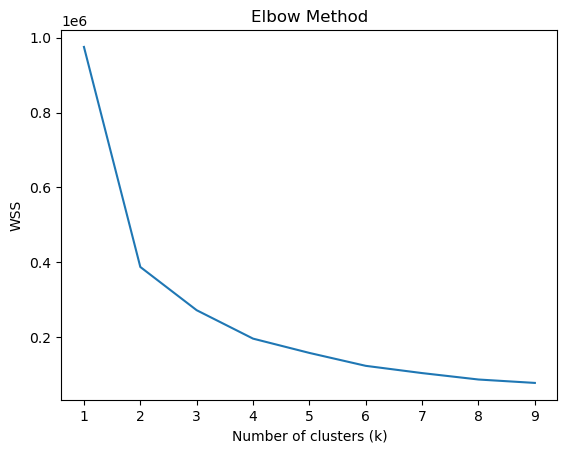

In [10]:
# Plot the values of K vs WSS
import matplotlib.pyplot as plt
plt.plot(range(1,10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WSS')
plt.show()


In [11]:
# fit the model with the optimal k value
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(dataset_1)

KMeans(n_clusters=5)

In [12]:
# Instantiate a KMeans model with the optimal K value
model = KMeans(n_clusters=optimal_k)
model.fit(dataset_1)

KMeans(n_clusters=5)

In [13]:
# Get the cluster labels for each data point
labels = model.predict(dataset_1)

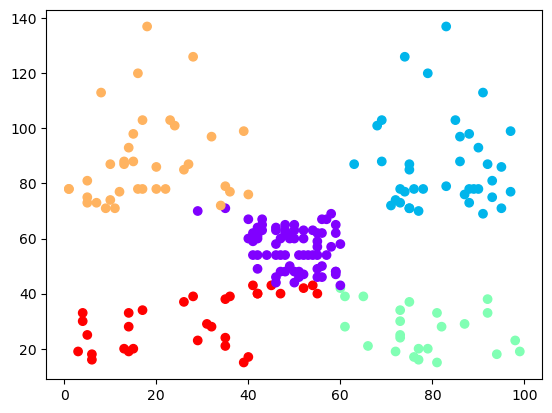

In [14]:
# Create a scatter plot of the data points with colors assigned by cluster
plt.scatter(dataset_1.iloc[:, -1], dataset_1.iloc[:, -2], c=labels, cmap='rainbow')
plt.show()

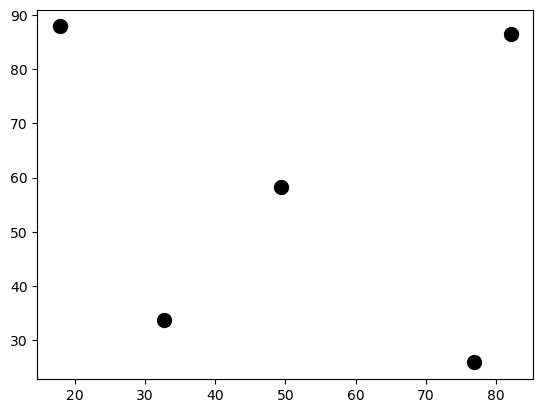

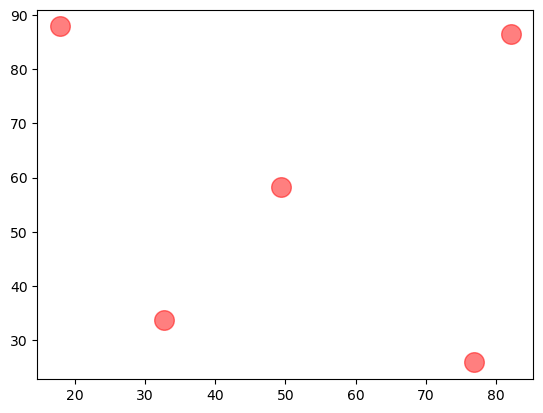

In [15]:
# plot the centers of the clusters with a larger size
plt.scatter(kmeans.cluster_centers_[:, -1], kmeans.cluster_centers_[:, -2], s=100, color='black')
plt.show()

centers = kmeans.cluster_centers_
plt.scatter(centers[:, -1], centers[:, -2], c='red', s=200, alpha=0.5)
plt.show()

In [16]:
# Count the number of customers in each cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()
print("Number of customers in each cluster:")
print(cluster_counts)

Number of customers in each cluster:
0    70
1    39
2    24
3    36
4    31
dtype: int64


In [17]:
# Calculate the mean of each variable by cluster
cluster_means = dataset_1.groupby(labels).mean()
print("Mean of each variable by cluster:")
print(cluster_means)

Mean of each variable by cluster:
   CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
0   90.514286  43.600000           56.985714               49.528571
1  162.000000  32.692308           86.538462               82.128205
2   25.166667  25.833333           26.958333               77.791667
3  164.000000  40.805556           87.916667               17.888889
4   30.258065  43.677419           30.193548               27.709677


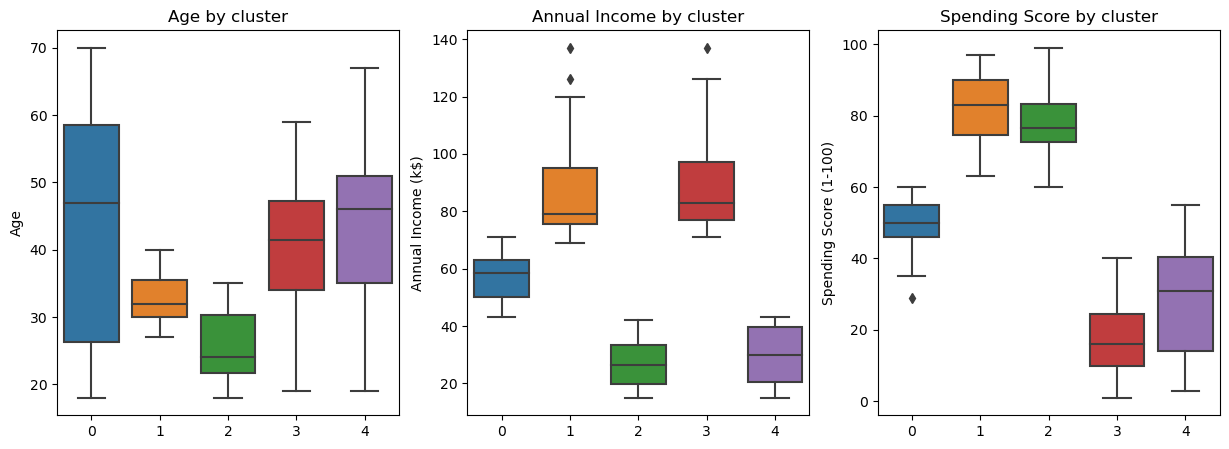

In [18]:
# Visualize the distribution of each variable by cluster
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=labels, y='Age', data=dataset_1)
plt.title('Age by cluster')
plt.subplot(1, 3, 2)
sns.boxplot(x=labels, y='Annual Income (k$)', data=dataset_1)
plt.title('Annual Income by cluster')
plt.subplot(1, 3, 3)
sns.boxplot(x=labels, y='Spending Score (1-100)', data=dataset_1)
plt.title('Spending Score by cluster')
plt.show()
